In [ ]:
!pip install pandas_profiling

  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=ab41c8c683166f420301e7f01502c2425a5ea689c488d308d9a1ac1972e20942
  Stored in directory: c:\users\happysoul\appdata\local\pip\cache\wheels\1d\05\04\c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=ccb072811fdd910523e394367f01c27a60302b2b3bdf5ac7e5fc2cae70348f70
  Stored in directory: c:\users\happysoul\appdata\local\pip\cache\wheels\51\f9\a5\740af2fdb0ad1edf79aabdc41531be0b6f0b2e2be684c388cf
Successfully built htmlmin imagehash
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 1.1.1
    Uninstalling MarkupSafe-1.1.1:
      Successfully uninstalled MarkupSafe-1.1.1


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\HappySoul\\anaconda3\\Lib\\site-packages\\~arkupsafe\\_speedups.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [ ]:
import pandas as pd
import math
import requests
import numpy as np
import json


# datetime
from datetime import datetime

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('AllData.csv',index_col=False)
df = df.loc[:, ~df.columns.str.match('Unnamed')]
print(df.shape)
df.head()

(396, 17)


,Date,Load Type,Load Weight,Dropoff Site,Route Type,Route Number,Time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2013-12-29,"['YARD TRIMMING', 'YARD TRIMMING', 'YARD TRIMM...",5864992.0,"['HORNSBY BEND', 'HORNSBY BEND', 'HORNSBY BEND...","['YARD TRIMMINGS', 'YARD TRIMMINGS', 'YARD TRI...","['YF01', 'YH01', 'YW13', 'DH1', 'YH06', 'RFAU2...","[datetime.time(12, 10), datetime.time(16, 38),...",8.9,-0.5,17.8,0.0,0.0,NaN,4.7,NaN,1026.9,0.0
1,2014-01-05,"['GARBAGE COLLECTIONS', 'GARBAGE COLLECTIONS',...",9650424.0,"['TDS LANDFILL', 'TDS LANDFILL', 'TDS LANDFILL...","['GARBAGE COLLECTION', 'GARBAGE COLLECTION', '...","['PAW72', 'PAH71', 'PH34', 'BU06', 'RHBU13', '...","[datetime.time(14, 12), datetime.time(12, 38),...",8.0,-2.1,21.7,0.0,0.0,NaN,8.7,NaN,1023.5,0.0
2,2014-01-12,"['GARBAGE COLLECTIONS', 'GARBAGE COLLECTIONS',...",9311385.0,"['TDS LANDFILL', 'TDS LANDFILL', 'TDS - MRF', ...","['GARBAGE COLLECTION', 'GARBAGE COLLECTION', '...","['PAW64', 'PH21', 'RMAU21', 'DA02', 'PAH09', '...","[datetime.time(18, 35), datetime.time(13, 42),...",10.5,-5.5,23.9,6.9,0.0,NaN,6.6,NaN,1027.3,0.0
3,2014-01-19,"['BULK', 'BULK', 'GARBAGE COLLECTIONS', 'GARBA...",8808898.0,"['TDS LANDFILL', 'TDS LANDFILL', 'TDS LANDFILL...","['BULK', 'BULK', 'GARBAGE COLLECTION', 'GARBAG...","['BU22', 'BU22', 'PT10', 'PAM85', 'DF1', 'PH32...","[datetime.time(15, 46), datetime.time(14, 1), ...",13.0,2.8,24.4,0.0,0.0,NaN,7.0,NaN,1022.2,0.0
4,2014-01-26,"['TIRES', 'YARD TRIMMING', 'GARBAGE COLLECTION...",8335148.0,"['MRF', 'HORNSBY BEND', 'TDS LANDFILL', 'TDS -...","['BULK', 'YARD TRIMMINGS', 'GARBAGE COLLECTION...","['BU30', 'YW12', 'PAM70', 'PW22', 'PAH81', 'PM...","[datetime.time(0, 0), datetime.time(12, 50), d...",9.9,-3.2,27.8,2.8,0.0,NaN,7.7,NaN,1023.2,0.0


In [ ]:
from pandas_profiling import ProfileReport
#report=ProfileReport(df)
#report

ModuleNotFoundError: No module named 'pandas_profiling'

In [ ]:
categorical_cols =[c for c in df.columns if (1<df[c].nunique())&(df[c].dtype !=np.number)&(df[c].dtype!= int)]
categorical_cols.remove('Date')
categorical_cols

C:\Users\HAPPYS~1\AppData\Local\Temp/ipykernel_31200/815223697.py:1: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  categorical_cols =[c for c in df.columns if (1<df[c].nunique())&(df[c].dtype !=np.number)&(df[c].dtype!= int)]


['Load Type', 'Dropoff Site', 'Route Type', 'Route Number', 'Time']

In [ ]:
for col in categorical_cols:
    df[col]=df[col].astype('category')

In [ ]:
binary_col = df.select_dtypes('category').columns
binary_col

Index(['Date', 'Load Type', 'Dropoff Site', 'Route Type', 'Route Number',
       'Time'],
      dtype='object')

In [ ]:
num_cols=df.select_dtypes('number').columns
num_cols

Index(['Load Weight', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd',
       'wpgt', 'pres', 'tsun'],
      dtype='object')

<AxesSubplot:xlabel='Load Weight', ylabel='Density'>

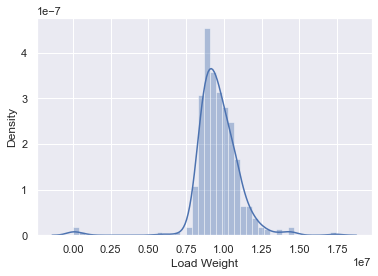

In [ ]:
sns.distplot(df['Load Weight'])

In [ ]:
plt.figure(figsize=(15,5))
sns.set(style = 'darkgrid')
i=1
for col in categorical_cols:
    plt.subplot(5,1,i)
    sns.boxplot(data=df,x=col,y='Load Weight')
    i=i+1
plt.show()

In [ ]:

for col in num_cols:
    plt.figure(figsize=(15,2))
    sns.distplot(df[col],kde=True)
    plt.title(col+"distribution")
    plt.show()

In [ ]:
#correlation analysis

data_corr = df.corr()
df_upper = data_corr.where(np.triu(np.ones(data_corr.shape,dtype=np.int),k=1).astype(np.bool))
corr80 = [col for col in df_upper.columns if any(df_upper[col])>= 0.9]
corr80

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1a1cabe9-69f7-4a67-be18-e232e1feb2b6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>